In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [2]:
#Load the data
data_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing_data = pd.read_csv(data_url)
housing_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#Explore Data
housing_data.info()
housing_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
# Separation of columns
numeric_features = housing_data.select_dtypes(include=[float, int]).columns
categorical_features = housing_data.select_dtypes(include=[object]).columns

# Features
print("Numeric features:")
print(numeric_features)
print("Categorical features:")
print(categorical_features)



Numeric features:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
Categorical features:
Index(['ocean_proximity'], dtype='object')


In [5]:
# Handle missing values
housing_data[numeric_features] = housing_data[numeric_features].fillna(housing_data[numeric_features].median())

for column in categorical_features:
    mode_value = housing_data[column].mode()[0]  
    housing_data[column] = housing_data[column].fillna(mode_value)

In [6]:
# Feature Engineering
housing_data['rooms_per_bedroom'] = housing_data['total_rooms'] / housing_data['total_bedrooms']
housing_data['log_median_house_value'] = np.log1p(housing_data['median_house_value'])

In [7]:
# Encode
housing_data = pd.get_dummies(housing_data, drop_first=True)

# Scaling
scaler = StandardScaler()
housing_data[numeric_features] = scaler.fit_transform(housing_data[numeric_features])

# defining
X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

# Evaluating the model
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression R² Score: {lr_r2}")

Linear Regression MAE: 0.22347066689809944
Linear Regression MSE: 0.08792151311138137
Linear Regression R² Score: 0.9106600159865629


In [10]:
# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)

print(f"Random Forest Mean Absolute Error: {rf_mae}")

# Evaluating
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R² Score: {rf_r2}")


Random Forest Mean Absolute Error: 0.0001591569494416817
Random Forest MAE: 0.0001591569494416817
Random Forest MSE: 4.351512583166505e-07
Random Forest R² Score: 0.9999995578282824


In [11]:
# Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)

# Evaluating
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print(f"Ridge Regression MAE: {ridge_mae}")
print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Ridge Regression R² Score: {ridge_r2}")


Ridge Regression MAE: 0.2234860596171811
Ridge Regression MSE: 0.08793867632523544
Ridge Regression R² Score: 0.9106425758721122


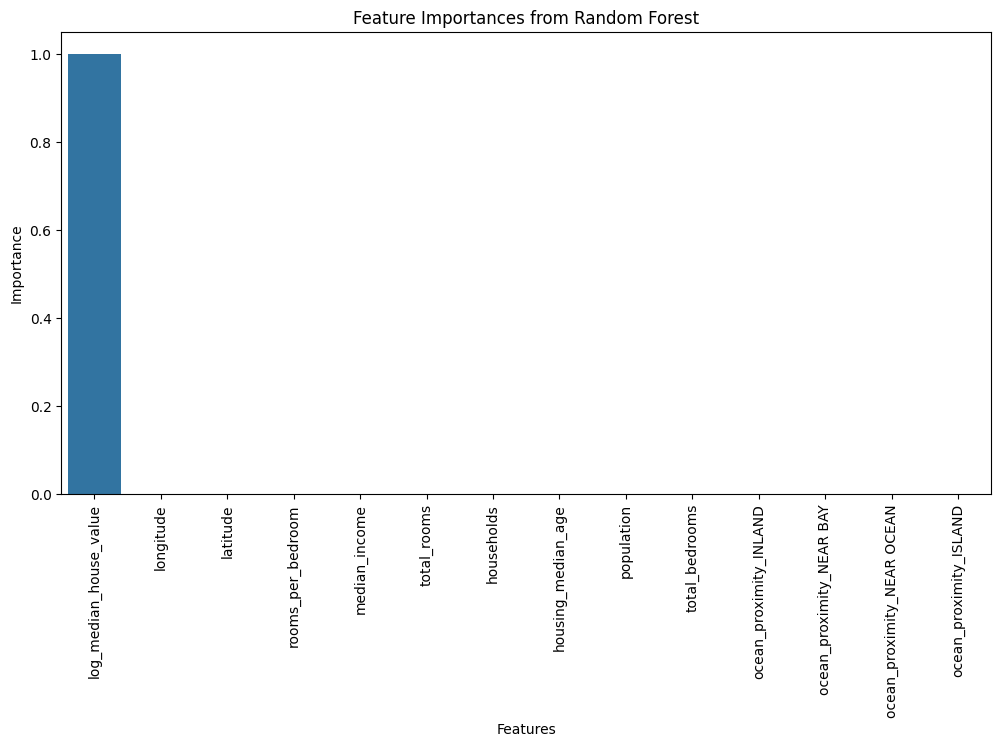

In [12]:
# Plot feature importances for Random Forest
features = X.columns
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=features[indices], y=importances[indices])
plt.title('Feature Importances from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [13]:
# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_ridge = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"Linear Regression CV Mean Squared Error: {-cv_scores_lr.mean()}")
print(f"Random Forest CV Mean Squared Error: {-cv_scores_rf.mean()}")
print(f"Ridge Regression CV Mean Squared Error: {-cv_scores_ridge.mean()}")

Linear Regression CV Mean Squared Error: 0.09414140665688864
Random Forest CV Mean Squared Error: 3.4071050441684245e-07
Ridge Regression CV Mean Squared Error: 0.09413710552479


In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [15]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)





In [16]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [17]:
# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best CV score: ", -grid_search.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best CV score:  9.716181489663785e-07


In [18]:
#best model for predictions
best_rf_model = grid_search.best_estimator_
best_rf_y_pred = best_rf_model.predict(X_test)

# Evaluate the best Random Forest model
best_rf_mae = mean_absolute_error(y_test, best_rf_y_pred)
best_rf_mse = mean_squared_error(y_test, best_rf_y_pred)
best_rf_r2 = r2_score(y_test, best_rf_y_pred)

print(f"Best Random Forest MAE: {best_rf_mae}")
print(f"Best Random Forest MSE: {best_rf_mse}")
print(f"Best Random Forest R² Score: {best_rf_r2}")

Best Random Forest MAE: 0.00015428649278245862
Best Random Forest MSE: 5.187531668658688e-07
Best Random Forest R² Score: 0.9999994728775928
